# From Modeling to Evaluation


## Introduction

In this lab, we will continue learning about the data science methodology, and focus on the **Modeling** and **Evaluation** stages.

## Objectives

After complting this lab you will be able to:

* Create Models
* Evaluate the models


## Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Data Modeling](#2)<br>
2. [Model Evaluation](#4)<br>
</div>
<hr>


We will repeat the preprocessing steps that we implemented in Lab **From Understanding to Preparation** in order to prepare the data for modeling. For more details on preparing the data, please refer to Lab **From Understanding to Preparation**.


In [1]:
import pandas as pd

recipes = pd.read_pickle('recipes.pickle')

recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57403 entries, 0 to 57402
Columns: 384 entries, cuisine to zucchini
dtypes: bool(383), string(1)
memory usage: 21.4 MB


<hr>


# Data Modeling <a id="2"></a>


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%204/images/flowchart_data_modeling.png" width="500">


Let's start by importing the libraries relevant to decision trees


In [2]:
from sklearn import tree

Check the data again!


In [3]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,vietnamese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,vietnamese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,vietnamese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,vietnamese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Only Asian and Indian Cuisines

Here, we are creating a decision tree for the recipes for just some of the Asian (Korean, Japanese, Chinese, Thai) and Indian cuisines. The reason for this is because the decision tree does not run well when the data is biased towards one cuisine, in this case American cuisines. One option is to exclude the American cuisines from our analysis or just build decision trees for different subsets of the data. Let's go with the latter solution.


In [4]:
bamboo_list = ['korean', 'japanese', 'chinese', 'thai', 'indian']
bamboo = recipes.loc[recipes.cuisine.isin(bamboo_list)]
bamboo

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
65,indian,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66,indian,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67,indian,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
68,indian,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69,indian,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57398,japanese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
57399,japanese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
57400,japanese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
57401,japanese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
x = bamboo.drop('cuisine', axis='columns')
x

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
65,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
68,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
57399,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
57400,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
57401,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
y = bamboo.cuisine
y

65         indian
66         indian
67         indian
68         indian
69         indian
           ...   
57398    japanese
57399    japanese
57400    japanese
57401    japanese
57402    japanese
Name: cuisine, Length: 2448, dtype: string

Let's build our decision tree using the data pertaining to the Asian and Indian cuisines and name our decision tree *bamboo_tree*.


In [7]:
bamboo_tree = tree.DecisionTreeClassifier()
bamboo_tree = bamboo_tree.fit(x, y)

Let's plot the decision tree and examine how it looks like.


In [8]:
import matplotlib.pyplot as plt

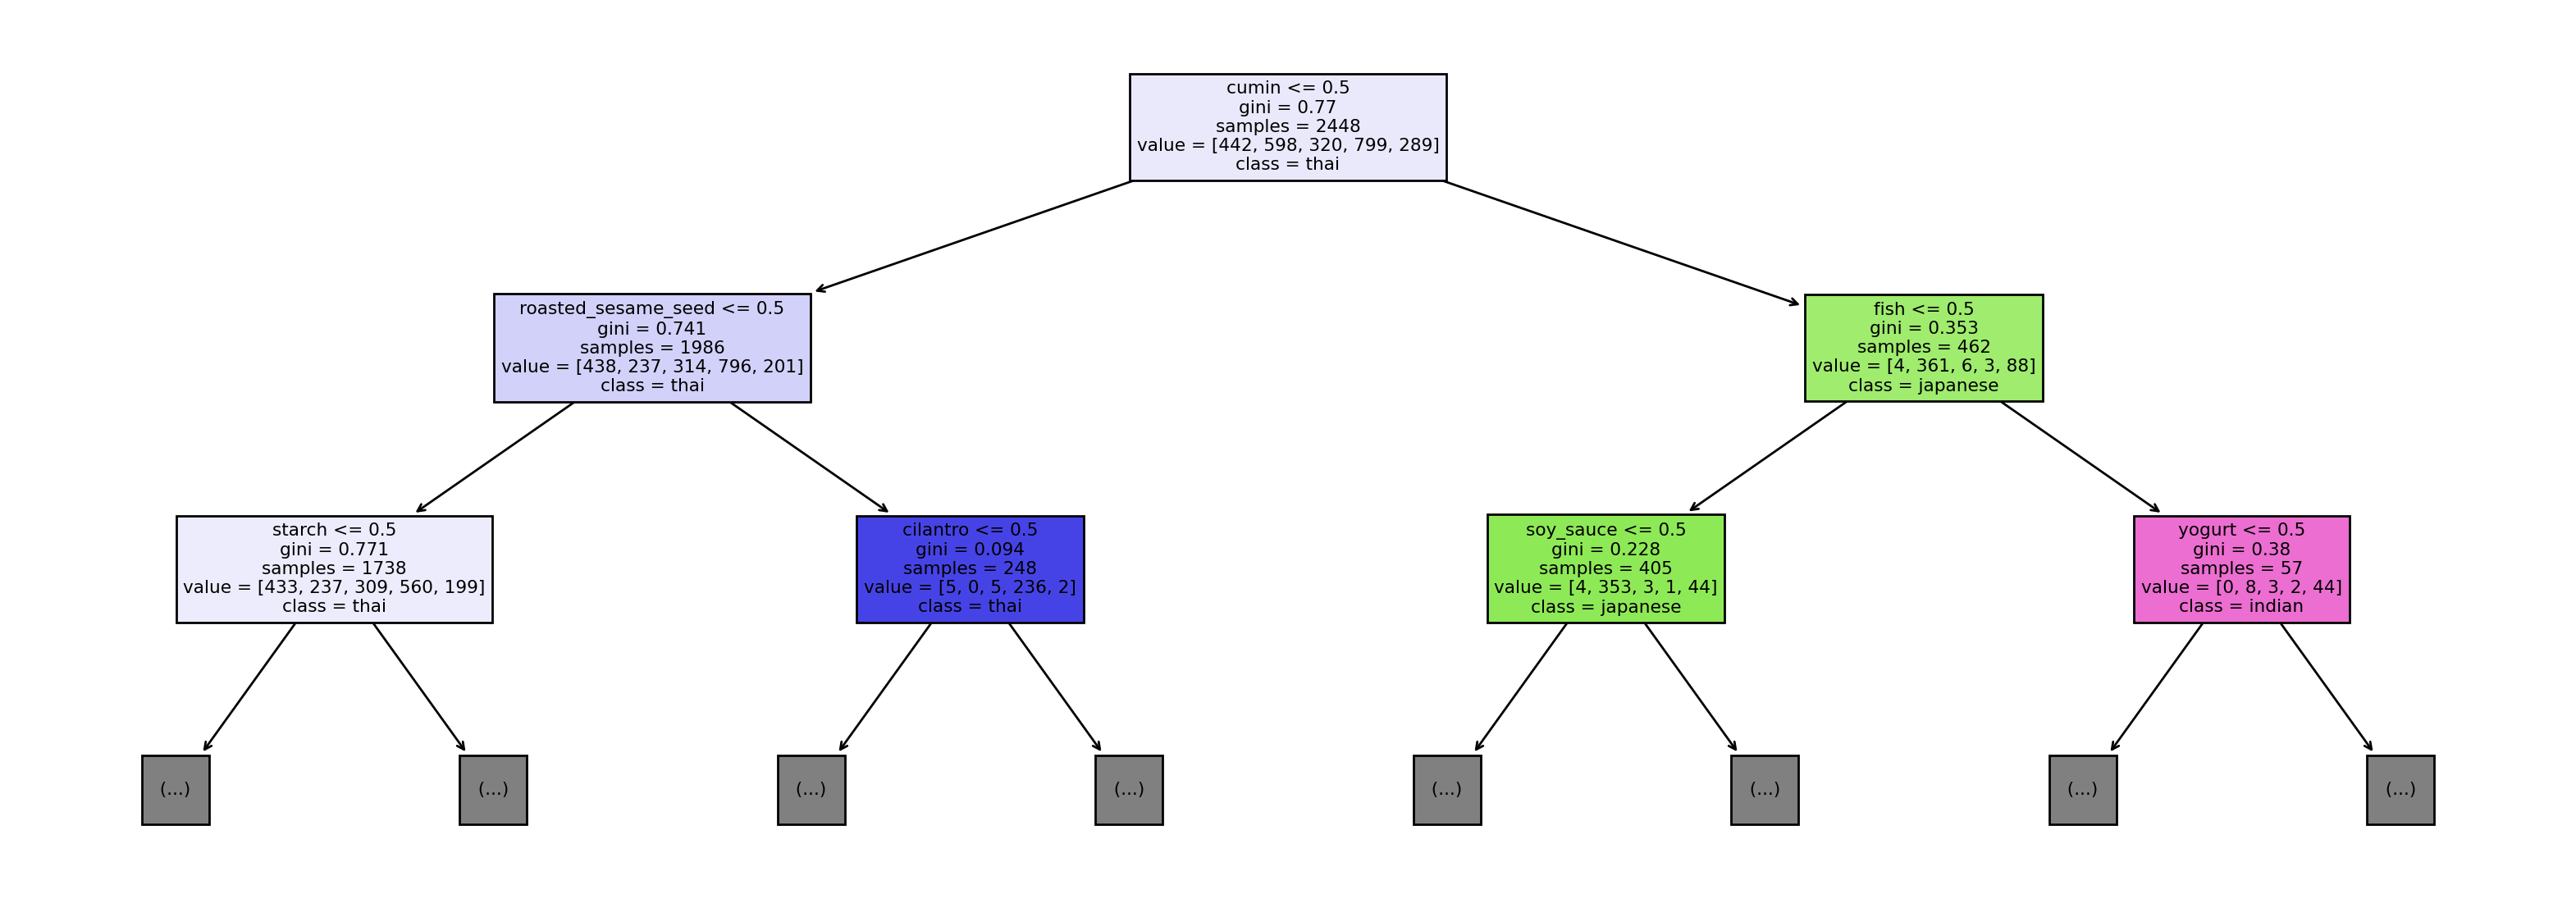

In [9]:
fig = plt.figure(figsize=(20,7), dpi=200)
tree.plot_tree(bamboo_tree, 
               feature_names=x.columns.to_list(),
               class_names=bamboo_list,
               max_depth=2, 
               filled=True);

In [10]:
bamboo_rule = tree.export_text(bamboo_tree, 
                               feature_names=x.columns.to_list(), 
                               class_names=bamboo_list, 
                               max_depth=3)
print(bamboo_rule)

|--- cumin <= 0.50
|   |--- roasted_sesame_seed <= 0.50
|   |   |--- starch <= 0.50
|   |   |   |--- lime_juice <= 0.50
|   |   |   |   |--- truncated branch of depth 57
|   |   |   |--- lime_juice >  0.50
|   |   |   |   |--- truncated branch of depth 10
|   |   |--- starch >  0.50
|   |   |   |--- coconut <= 0.50
|   |   |   |   |--- truncated branch of depth 22
|   |   |   |--- coconut >  0.50
|   |   |   |   |--- truncated branch of depth 2
|   |--- roasted_sesame_seed >  0.50
|   |   |--- cilantro <= 0.50
|   |   |   |--- coriander <= 0.50
|   |   |   |   |--- truncated branch of depth 12
|   |   |   |--- coriander >  0.50
|   |   |   |   |--- class: indian
|   |   |--- cilantro >  0.50
|   |   |   |--- cane_molasses <= 0.50
|   |   |   |   |--- class: korean
|   |   |   |--- cane_molasses >  0.50
|   |   |   |   |--- class: indian
|--- cumin >  0.50
|   |--- fish <= 0.50
|   |   |--- soy_sauce <= 0.50
|   |   |   |--- lemongrass <= 0.50
|   |   |   |   |--- truncated branch of de

#### Here is how we use the model, **bamboo_tree**, to predict an outcome of classification.

In [11]:
ingred_test = x.iloc[0:1]
ingred_test

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
65,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
bamboo_tree.predict(ingred_test)

array(['indian'], dtype=object)

In [13]:
true_cuisine = y.iloc[0:1]
true_cuisine

65    indian
Name: cuisine, dtype: string

You can analyze the remaining branches of the tree to come up with similar rules for determining the cuisine of different recipes. 


Feel free to select another subset of cuisines and build a decision tree of their recipes. You can select some European cuisines and build a decision tree to explore the ingredients that differentiate them.


# Model Evaluation <a id="4"></a>


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%204/images/flowchart_evaluation.png" width="500">


To evaluate our model of Asian and Indian cuisines, we will split our dataset into a training set and a test set. We will build the decision tree using the training set. Then, we will test the model on the test set and compare the cuisines that the model predicts to the actual cuisines. 


In [14]:
bamboo

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
65,indian,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66,indian,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67,indian,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
68,indian,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69,indian,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57398,japanese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
57399,japanese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
57400,japanese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
57401,japanese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
pd.crosstab(bamboo['cuisine'], '')

col_0,
cuisine,
chinese,442
indian,598
japanese,320
korean,799
thai,289


In [16]:
x = bamboo.drop('cuisine', axis='columns')
y = bamboo.cuisine

Let's remove 30% from each cuisine to use as the test set.


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
tts = train_test_split(x, y, 
                       test_size=0.3,
                       random_state=24
                      )

xtrain = tts[0]
xtest = tts[1]

ytrain = tts[2]
ytest = tts[3]

In [19]:
ytest.value_counts()

cuisine
korean      253
indian      164
chinese     128
thai         95
japanese     95
Name: count, dtype: Int64

In [20]:
bamboo['cuisine'].value_counts()

cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: Int64

Make sure that the test set has the same proportion to the dataset.

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.3, 
                                                random_state=24,
                                                stratify=y)
ytest.value_counts()

cuisine
korean      240
indian      179
chinese     133
japanese     96
thai         87
Name: count, dtype: Int64

Let's build the decision tree using the training set.


In [22]:
bamboo_tree = tree.DecisionTreeClassifier()
bamboo_tree.fit(xtrain, ytrain)

DecisionTreeClassifier()

Let's plot the decision tree and explore it.


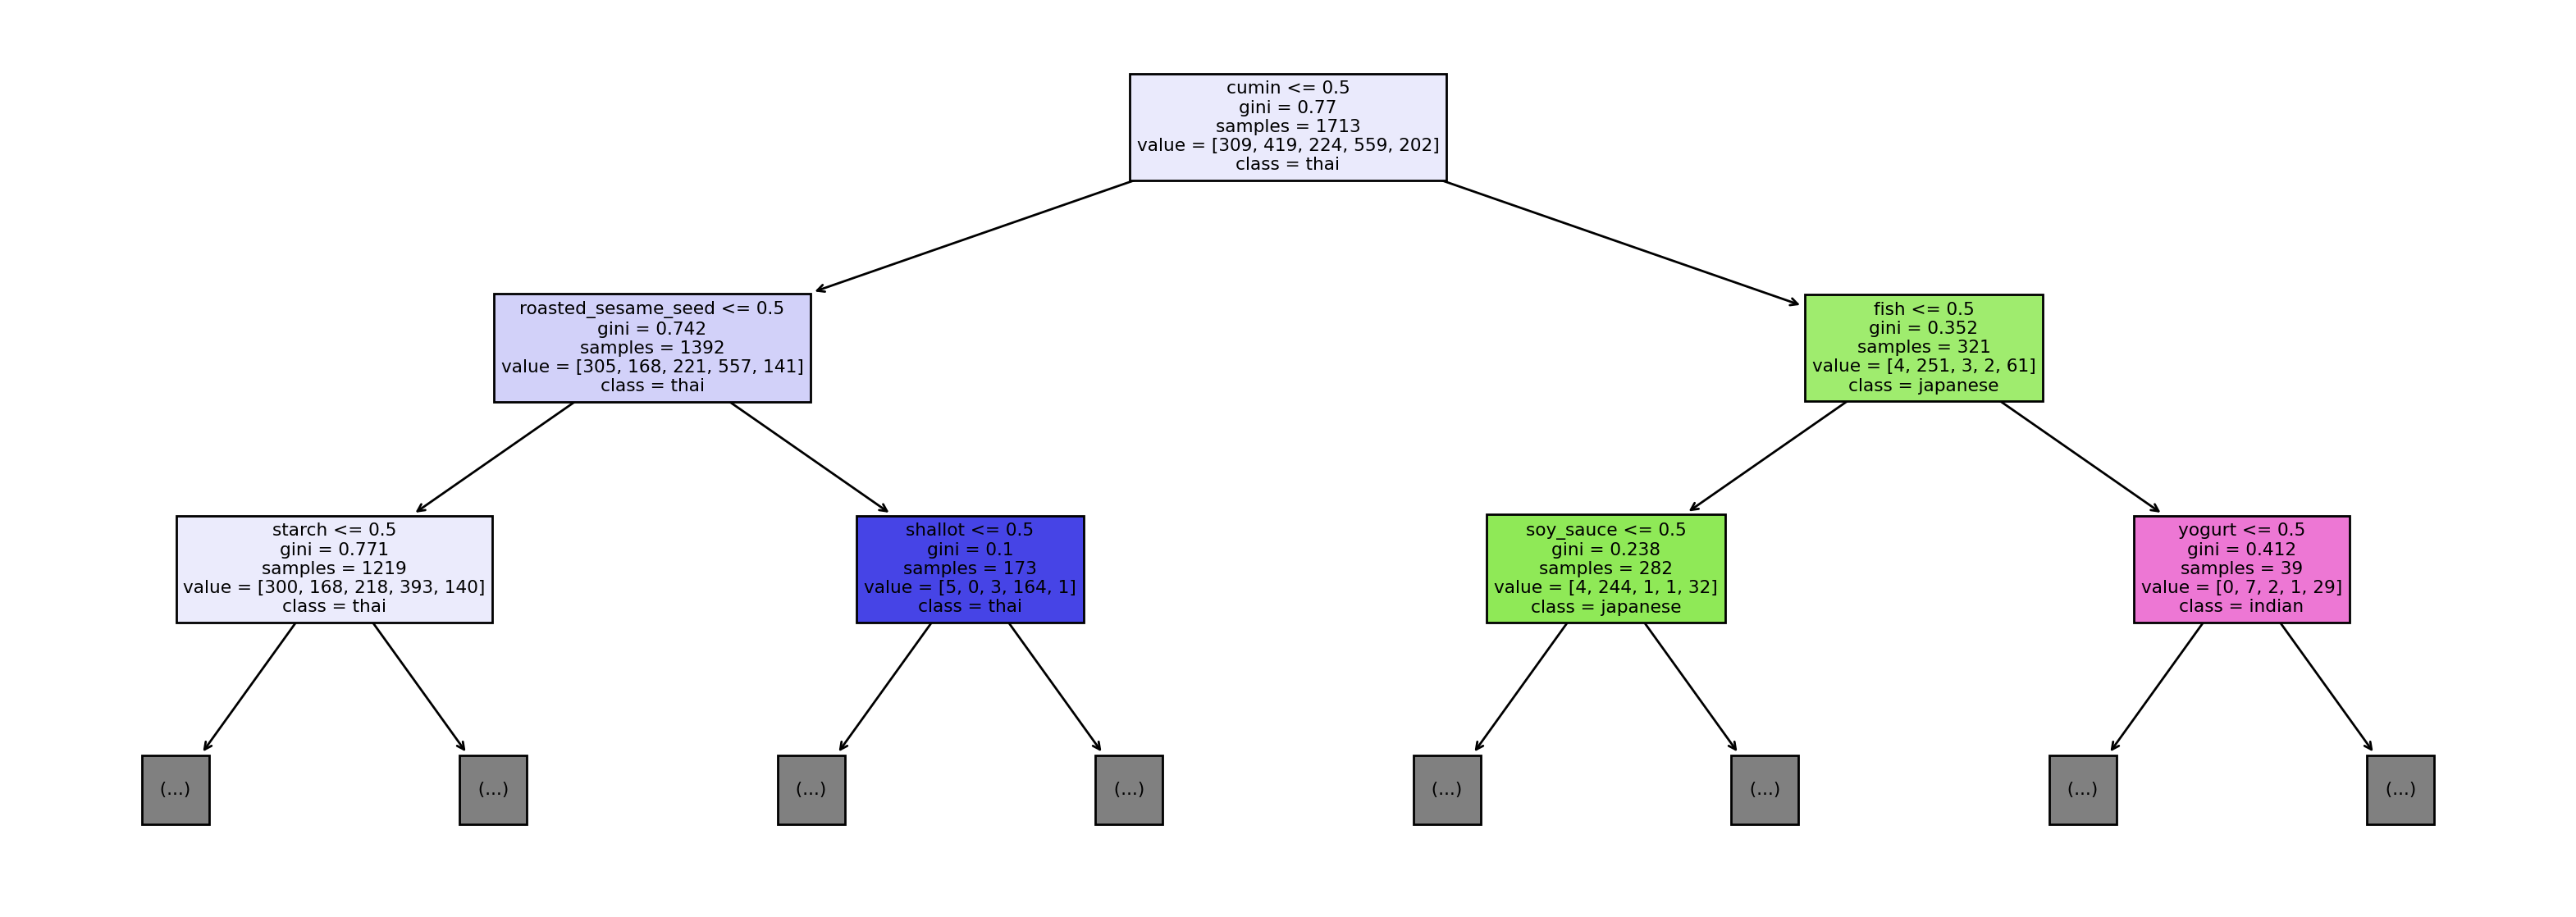

In [23]:
fig = plt.figure(figsize=(20,7), dpi=200)
tree.plot_tree(bamboo_tree, 
               feature_names=x.columns.to_list(),
               class_names=bamboo_list,
               max_depth=2, 
               filled=True);

#### Now let's test our model on the test data.


In [24]:
ypred = bamboo_tree.predict(xtest)

In [25]:
ypred == ytest

13445     True
11303    False
15427     True
15042     True
17086     True
         ...  
11386    False
2455     False
10789     True
10925    False
15739     True
Name: cuisine, Length: 735, dtype: boolean

#### Take a look at the **bamboo_tree** accuracy

In [26]:
pred_eval = (ypred == ytest)
n_test = pred_eval.count()
prec = pred_eval.sum()
accuracy = prec/n_test
print(f'Bamboo tree accuracy is {accuracy}')

Bamboo tree accuracy is 0.7238095238095238


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = accuracy_score(ypred, ytest)
print(f'Bamboo tree accuracy is {accuracy}')

Bamboo tree accuracy is 0.7238095238095238


To quantify how well the decision tree is able to determine the cuisine of each recipe correctly, we will create a confusion matrix which presents a nice summary on how many recipes from each cuisine are correctly classified. It also sheds some light on what cuisines are being confused with what other cuisines.


So let's go ahead and create the confusion matrix for how well the decision tree is able to correctly classify the recipes in the test set.


In [29]:
import sklearn.metrics as metrics

In [30]:
sorted_bamboo_list = sorted(bamboo_list)
sorted_bamboo_list

['chinese', 'indian', 'japanese', 'korean', 'thai']

In [31]:
cmat = metrics.confusion_matrix(ytest, ypred, labels=sorted_bamboo_list)
print(cmat)

[[ 84   4  15  26   4]
 [  8 154   0   7  10]
 [ 17   6  50  19   4]
 [ 21   5  13 199   2]
 [ 19  12   1  10  45]]


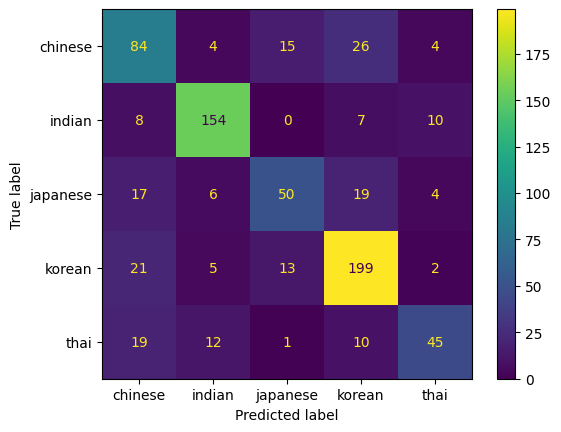

In [32]:
cmat = metrics.confusion_matrix(ytest, ypred, labels=sorted_bamboo_list)
cmat_disp = metrics.ConfusionMatrixDisplay(cmat, display_labels=sorted_bamboo_list)
cmat_disp.plot()

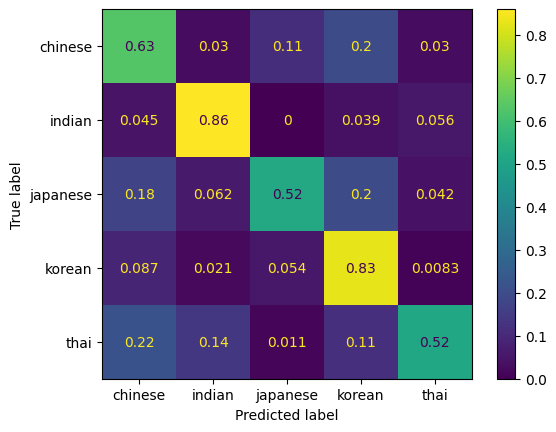

In [33]:
cmat = metrics.confusion_matrix(ytest, ypred, labels=sorted_bamboo_list, normalize='true')
cmat_disp = metrics.ConfusionMatrixDisplay(cmat, display_labels=sorted_bamboo_list)
cmat_disp.plot()

The rows represent the actual cuisines from the dataset and the columns represent the predicted ones. Each row should sum to 100%. We make the following observations:

How many **Japanese** recipes were correctly classified by our decision tree?


How many **Korean** recipes were misclassified as **Japanese**?


What cuisine has the least number of recipes correctly classified by the decision tree?


### Let's see the ROC curves.

In [34]:
predictions = bamboo_tree.predict_proba(xtest)
predictions

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [35]:
predictions.shape

(735, 5)

In [36]:
bamboo_list

['korean', 'japanese', 'chinese', 'thai', 'indian']

In [37]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

yb = label_binarize(y, classes=bamboo_list)
xtrain, xtest, ytrain, ytest = train_test_split(x, yb, 
                                                test_size=0.3, 
                                                random_state=25,
                                                stratify=y)

classifier = OneVsRestClassifier(tree.DecisionTreeClassifier())
yscore = classifier.fit(xtrain, ytrain).predict_proba(xtest)

fpr = dict()
tpr = dict()
for k in range(len(bamboo_list)):
    b = bamboo_list[k]
    fpr[b], tpr[b], _ = metrics.roc_curve(ytest[:, k], yscore[:, k])

In [38]:
print(fpr['thai'])
print(tpr['thai'])

[0.         0.03703704 0.04012346 0.04783951 1.        ]
[0.         0.64367816 0.65517241 0.67816092 1.        ]


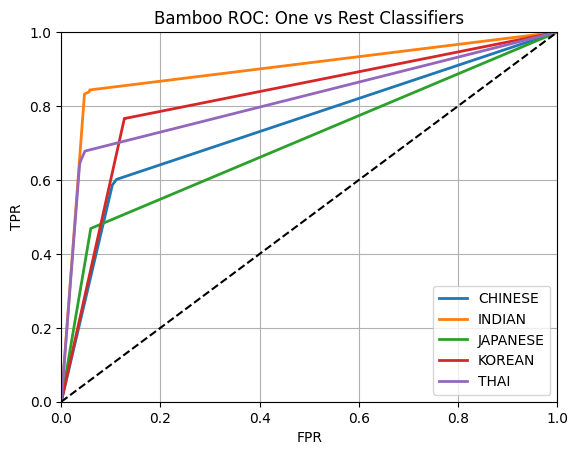

In [45]:
for b in sorted_bamboo_list:
    plt.plot(fpr[b], tpr[b], label=b.upper(), linewidth=2)
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Bamboo ROC: One vs Rest Classifiers')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.grid()
plt.show()

-----------

#### Update logs

| Commit      |  Date         |  Author        |
|-------------|---------------|----------------|
| Added ROC     | 2013 Jan 07   | R. Promkam     |
| Initial     | 2013 Jan 05   | R. Promkam     |

<br>
<hr>
